## Импорт библиотек

In [1]:
import cv2
import sys
import os
import pandas as pd
import numpy as np
from pathlib import Path
import mediapipe as mp
import matplotlib.pyplot as plt


computation_path = str(Path(os.getcwd()).parent / Path('computation'))
if computation_path not in sys.path:
    sys.path.append(computation_path)
import compute_utils as utils
import constants

# Проверка на точность расстановки точек на лице с электродами

In [3]:
def calculate_points(image, model_results):
    points_dict = {}
    size = image.shape[0: 2]
    
    left_eye_coords = utils.get_coords(model_results,  size, constants.LEFT_EYE_POINTS)
    right_eye_coords = utils.get_coords(model_results,  size, constants.RIGHT_EYE_POINTS)

    left_eyebrow_coords = utils.get_coords(model_results,  size, constants.LEFT_TOP_EYEBROW_POINTS)
    right_eyebrow_coords = utils.get_coords(model_results,  size, constants.RIGHT_TOP_EYEBROW_POINTS)

    points_dict['left_eye_center'] = utils.calculate_geom_center(left_eye_coords)
    points_dict['right_eye_center'] = utils.calculate_geom_center(right_eye_coords)
    points_dict['left_eyebrow_center'] = utils.calculate_geom_center(left_eyebrow_coords)
    points_dict['right_eyebrow_center'] = utils.calculate_geom_center(right_eyebrow_coords)

    mouth_coords = utils.get_coords(model_results,  size, constants.LIPS_POINTS)
    points_dict['left_mouth_corner'] = utils.get_coords(model_results,  size, constants.LEFT_LIP_CORNER)[0]
    points_dict['right_mouth_corner'] = utils.get_coords(model_results,  size, constants.RIGHT_LIP_CORNER)[0]

    points_dict['mouth_center'] = utils.calculate_geom_center(mouth_coords)

    return points_dict


def show_image_with_keypoints(image_file):
    image = cv2.imread(str(image_file))
    mp_face_mesh = mp.solutions.face_mesh

    with mp_face_mesh.FaceMesh(static_image_mode=True,
                            refine_landmarks=True,
                            max_num_faces=1,
                            min_detection_confidence=0.5,
                            min_tracking_confidence=0.8) as face_mesh_model:
        
        model_results = face_mesh_model.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)).multi_face_landmarks
        if not model_results:
            print('No face detected')
            return None
   
    model_results = model_results[0]
    points_dict = calculate_points(image, model_results)

    image_points = image.copy()
    for placement in points_dict:
        # return points_dict[placement]
        cv2.circle(image_points, list(map(int, points_dict[placement])), radius=3, color=(0, 255, 0), thickness=-1)
    
    return image_points


def show_image_with_mediapipe(image_file):
    image = cv2.imread(str(image_file))
    mp_face_mesh = mp.solutions.face_mesh
    mp_drawing = mp.solutions.drawing_utils
    mp_drawing_styles = mp.solutions.drawing_styles

    with mp_face_mesh.FaceMesh(static_image_mode=True,
                            refine_landmarks=True,
                            max_num_faces=1,
                            min_detection_confidence=0.5,
                            min_tracking_confidence=0.8) as face_mesh_model:
        
        results = face_mesh_model.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        if not results.multi_face_landmarks:
            print('No face detected')
            return None
   

        annotated_image = image.copy()
        for face_landmarks in results.multi_face_landmarks:
            mp_drawing.draw_landmarks(
                image=annotated_image,
                landmark_list=face_landmarks,
                connections=mp_face_mesh.FACEMESH_TESSELATION,
                landmark_drawing_spec=None,
                connection_drawing_spec=mp_drawing_styles
                .get_default_face_mesh_tesselation_style())
            mp_drawing.draw_landmarks(
                image=annotated_image,
                landmark_list=face_landmarks,
                connections=mp_face_mesh.FACEMESH_CONTOURS,
                landmark_drawing_spec=None,
                connection_drawing_spec=mp_drawing_styles
                .get_default_face_mesh_contours_style())
            mp_drawing.draw_landmarks(
                image=annotated_image,
                landmark_list=face_landmarks,
                connections=mp_face_mesh.FACEMESH_IRISES,
                landmark_drawing_spec=None,
                connection_drawing_spec=mp_drawing_styles
                .get_default_face_mesh_iris_connections_style())
        
        return annotated_image

In [13]:
image = show_image_with_keypoints('E:\\projects\\my_github\\exercise_recognition_mp\\data\\images\\olshin_1_4 - frame at 0m40s.jpg')
image_mp = show_image_with_mediapipe('E:\\projects\\my_github\\exercise_recognition_mp\\data\\images\\olshin_1_4 - frame at 0m12s.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_mp = cv2.cvtColor(image_mp, cv2.COLOR_BGR2RGB)

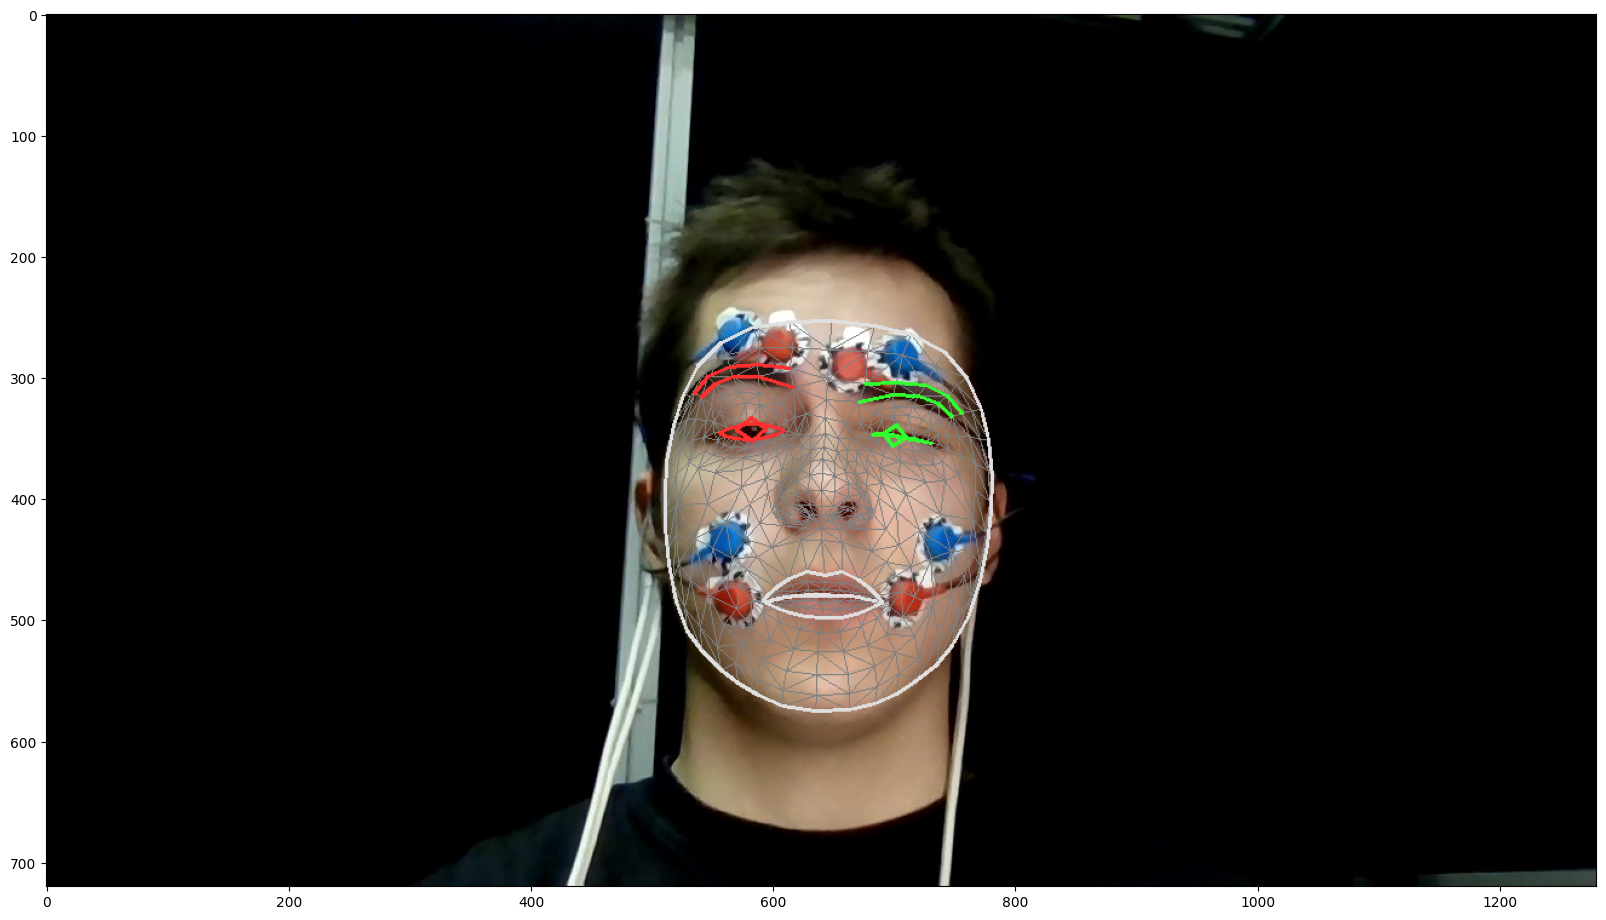

In [14]:
plt.figure(figsize=(20,15))
plt.imshow(image_mp)

plt.show()


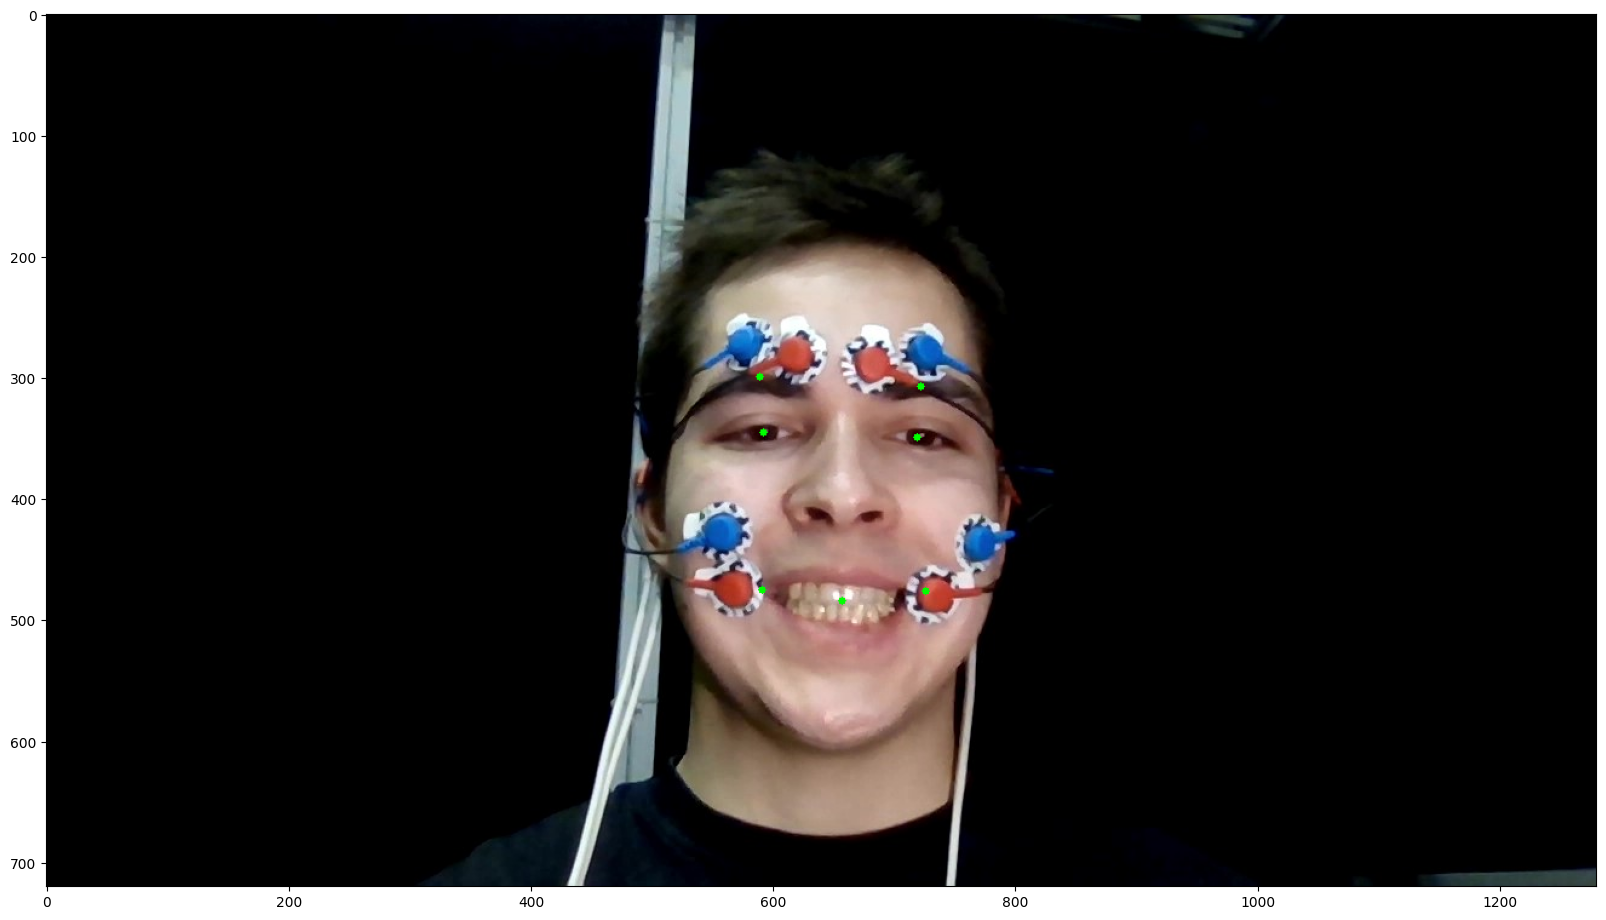

In [15]:
plt.figure(figsize=(20,15))
plt.imshow(image)

plt.show()


In [1]:
import os
os.chdir(os.path.expanduser("e:/projects/my_github/paresis_detection"))

In [7]:
import time

In [6]:
import cv2
aaimport time
import pandas as pd
import numpy as np
import mediapipe as mp
from pathlib import Path
from mediapipe.python.solutions import face_mesh
from mediapipe.framework.formats.landmark_pb2 import NormalizedLandmarkList
from pathlib import Path


# from computation.utils import shape_to_row_array
from computation import utils, calculate
from computation import constants

ImportError: cannot import name 'utils' from 'computation' (e:\projects\my_github\paresis_detection\computation\__init__.py)

In [ ]:
mp_face_mesh = mp.solutions.face_mesh
mp_drawing = mp.solutions.drawing_utils 
mp_drawing_styles = mp.solutions.drawing_styles
points = mp_face_mesh.FACEMESH_NOSE


In [ ]:
cap = cv2.VideoCapture(0)
if not cap.isOpened():
    print("Cannot open camera")
    exit()
while True:
    ret, frame = cap.read()
    cv2.imshow("frame", frame)
    if cv2.waitKey(1) == ord("q"):
        break

In [3]:
file = 'E:\\projects\\paresis_emg\\videos\\boiko_9.mp4'

In [12]:
cap.release()
cv2.destroyAllWindows()

In [ ]:
767	801


In [18]:
import time

In [1]:
a = [1, 2, 3]

In [2]:
for i in a:
    if i == 2:
        del i

In [3]:
a

[1, 2, 3]

In [4]:
cap = cv2.VideoCapture(')
total_frame_num = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
print(total_frame_num)
frame_num = 0

1290


In [23]:
cap = cv2.VideoCapture('E:\\projects\\paresis_emg\\videos\\olshin_2_1.mp4')
total_frame_num = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
print(total_frame_num)
frame_num = 0

if not cap.isOpened():
    print("Cannot open camera")
    exit()
while True:
    ret, frame = cap.read()
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    
    frame_num += 1
    # frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    colorimage_b = clahe.apply(frame[:,:,0])
    colorimage_g = clahe.apply(frame[:,:,1])
    colorimage_r = clahe.apply(frame[:,:,2])
    
    # Next we stack our equalized channels back into a single image
    colorimage_e = np.stack((colorimage_b, colorimage_g, colorimage_r), axis=2)
    side_by_side = np.hstack((frame,colorimage_e))

    cv2.imshow("frame", side_by_side)

    if cv2.waitKey(1) == ord("q"):
        break

cap.release()
cv2.destroyAllWindows()

1410


#  Ячейка визуализации точек

In [4]:
distances = constants.DISTANCES_EMPTY_DICT

In [13]:
with mp_face_mesh.FaceMesh(static_image_mode=False,
                        refine_landmarks=True,
                        max_num_faces=1,
                        min_detection_confidence=0.5,
                        min_tracking_confidence=0.99) as face_mesh_model:

    frame_num = 0
    cap = cv2.VideoCapture(0)
    if not cap.isOpened():
        print("Cannot open camera")
        exit()
    while True:
        ret, frame = cap.read()

        if not ret:
            print("Can't receive frame (stream end?). Exiting ...")
            break
        frame.flags.writeable = False
        model_results = face_mesh_model.process(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)).multi_face_landmarks
        frame.flags.writeable = True

        if not model_results:
            print("no face detected")
            continue

        model_results = model_results[0]

        # forehead
        left_eye_coords = utils.get_coords(model_results,  frame.shape[0: 2], constants.LEFT_EYE_POINTS)
        right_eye_coords = utils.get_coords(model_results,  frame.shape[0: 2], constants.RIGHT_EYE_POINTS)

        left_eyebrow_coords = utils.get_coords(model_results,  frame.shape[0: 2], constants.LEFT_EYEBROW_POINTS)
        right_eyebrow_coords = utils.get_coords(model_results,  frame.shape[0: 2], constants.RIGHT_EYEBROW_POINTS)

        left_eye_center = utils.calculate_geom_center(left_eye_coords)
        right_eye_center = utils.calculate_geom_center(right_eye_coords)
        left_eyebrow_center = utils.calculate_geom_center(left_eyebrow_coords)
        right_eyebrow_center = utils.calculate_geom_center(right_eyebrow_coords)
            # lips

        mouth_coords = utils.get_coords(model_results,  frame.shape[0: 2], constants.LIPS_POINTS)
        left_mouth_corner = utils.get_coords(model_results,  frame.shape[0: 2], constants.LEFT_LIP_CORNER)
        right_mouth_corner = utils.get_coords(model_results,  frame.shape[0: 2], constants.RIGHT_LIP_CORNER)


        mouth_center = utils.calculate_geom_center(mouth_coords)
        exercise = 'rest'
        distances[exercise]['forehead']['left'] = 0
        distances[exercise]['forehead']['right'] = 0
        distances[exercise]['mouth']['left'] = 0
        distances[exercise]['mouth']['right'] = 0
        print(calculate.calculate_distances(exercise, distances, frame, model_results))



        image = cv2.circle(frame, mouth_center.astype(int), 3, color=(0, 0, 255))

        image = cv2.circle(image, left_eye_center.astype(int), 3, color=(0, 0, 255))
        image = cv2.circle(image, right_eye_center.astype(int), 3, color=(0, 0, 255))

        image = cv2.circle(image, left_eyebrow_center.astype(int), 3, color=(0, 0, 255))
        image = cv2.circle(image, right_eyebrow_center.astype(int), 3, color=(0, 0, 255))

        image = cv2.circle(image, right_eye_center.astype(int), 3, color=(0, 0, 255))

        image = cv2.circle(image, left_mouth_corner[0].astype(int), 3, color=(0, 0, 255))
        image = cv2.circle(image, right_mouth_corner[0].astype(int), 3, color=(0, 0, 255))


        
        cv2.imshow("frame", image)
        if cv2.waitKey(1) == ord("q"):
            break

    cap.release()
    cv2.destroyAllWindows()

        

In [5]:
left_mouth_corner

array([[226.72513962, 436.73377991]])

# Калькулируем симметрию

In [9]:
df = pd.read_csv('E:\\projects\\my_github\\paresis_detection\\results\\calc_1\\symmetries\\20180125_Mordashov_1_symmetry.csv')
df

file_name  eyebrows_raising_forehead_symmetry  \
0  20180125_Mordashov_1.mp4                               0.739   

   eyebrows_raising_mouth_symmetry  eyebrows_raising_frames_qty  \
0                            0.872                           46   

   left_eye_squeezing_forehead_symmetry  left_eye_squeezing_mouth_symmetry  \
0                                 0.805                               0.83   

   left_eye_squeezing_frames_qty  right_eye_squeezing_forehead_symmetry  \
0                             40                                  0.671   

   right_eye_squeezing_mouth_symmetry  right_eye_squeezing_frames_qty  \
0                               0.454                              45   

   eyes_squeezing_forehead_symmetry  eyes_squeezing_mouth_symmetry  \
0                             0.862                           0.81   

   eyes_squeezing_frames_qty  smile_forehead_symmetry  smile_mouth_symmetry  \
0                         52                    0.819                  0.88   

   smile_frames_qty  forced_smile_forehead_symmetry  \
0                34                           0.584   

   forced_smile_mouth_symmetry  forced_smile_frames_qty  \
0                        0.675                       90   

   cheeks_puffing_forehead_symmetry  cheeks_puffing_mouth_symmetry  \
0                               0.8                          0.535   

   cheeks_puffing_frames_qty  lips_struggling_forehead_symmetry  \
0                         49                               0.94   

   lips_struggling_mouth_symmetry  lips_struggling_frames_qty  \
0                           0.733                          55   

   articulation_forehead_symmetry  articulation_mouth_symmetry  \
0                           0.961                        0.499   

   articulation_frames_qty  forced_articulation_forehead_symmetry  \
0                       42                                  0.906   

   forced_articulation_mouth_symmetry  forced_articulation_frames_qty  \
0                               0.886                              57   

   rest_state_frames_qty  damaged_frames_qty  total_frames_qty  
0                    449                   0               959

In [19]:
a = np.array([51.7, 52.3, 51.5, 51.0, 50.6, 51.0, 50.9, 49.5, 49.7, 49.8, 49.8, 49.2, 49.7, 49.0, 49.7, 48.8, 48.7, 48.4, 48.2, 48.2, 48.3, 48.0, 47.9, 48.0, 46.8, 46.9, 45.9, 44.9, 45.7, 46.2, 45.5, 46.4, 45.9, 45.3, 46.4, 45.6, 45.9, 46.2, 45.1, 43.1, 44.7, 45.0, 44.0, 45.6, 45.4, 45.8])

In [21]:
b = np.array([47.8, 48.4, 49.0, 48.9, 47.8, 48.8, 47.9, 46.2, 46.4, 46.1, 45.9, 45.4, 46.1, 45.9, 45.3, 45.2, 45.0, 45.0, 44.3, 44.2, 44.3, 44.4, 44.2, 43.9, 43.3, 44.8, 44.7, 44.4, 43.6, 44.2, 44.9, 44.8, 44.7, 43.9, 44.2, 44.0, 44.6, 43.8, 43.8, 44.1, 44.2, 44.2, 44.2, 43.8, 44.3, 44.2
              ])

In [20]:
max(abs(a - 42.5))


9.799999999999997

In [22]:
max(abs(b - 43.1))


5.899999999999999

In [23]:
5.899999999999999 / 9.799999999999997

0.6020408163265306

In [12]:
 max(np.abs(np.array([1]) - np.mean([1, 2])))

0.5

In [13]:
np.abs(np.array([1]) - np.mean([1, 2]))

array([0.5])

In [5]:
pd.set_option('adisplay.max_columns', 500)

In [25]:
points = pd.read_csv('results\\calc_1\\symmetries\\20180125_Mordashov_1_symmetry.csv')
points

file_name  eyebrows_raising_forehead_symmetry  \
0  20180125_Mordashov_1.mp4                               0.739   

   eyebrows_raising_mouth_symmetry  eyebrows_raising_frames_qty  \
0                            0.872                           46   

   left_eye_squeezing_forehead_symmetry  left_eye_squeezing_mouth_symmetry  \
0                                 0.805                               0.83   

   left_eye_squeezing_frames_qty  right_eye_squeezing_forehead_symmetry  \
0                             40                                  0.671   

   right_eye_squeezing_mouth_symmetry  right_eye_squeezing_frames_qty  \
0                               0.454                              45   

   eyes_squeezing_forehead_symmetry  eyes_squeezing_mouth_symmetry  \
0                             0.862                           0.81   

   eyes_squeezing_frames_qty  smile_forehead_symmetry  smile_mouth_symmetry  \
0                         52                    0.819                  0.88   

   smile_frames_qty  forced_smile_forehead_symmetry  \
0                34                           0.584   

   forced_smile_mouth_symmetry  forced_smile_frames_qty  \
0                        0.675                       90   

   cheeks_puffing_forehead_symmetry  cheeks_puffing_mouth_symmetry  \
0                               0.8                          0.535   

   cheeks_puffing_frames_qty  lips_struggling_forehead_symmetry  \
0                         49                               0.94   

   lips_struggling_mouth_symmetry  lips_struggling_frames_qty  \
0                           0.733                          55   

   articulation_forehead_symmetry  articulation_mouth_symmetry  \
0                           0.961                        0.499   

   articulation_frames_qty  forced_articulation_forehead_symmetry  \
0                       42                                  0.906   

   forced_articulation_mouth_symmetry  forced_articulation_frames_qty  \
0                               0.886                              57   

   rest_state_frames_qty  damaged_frames_qty  total_frames_qty  
0                    449                   0               959

In [58]:
points = pd.read_csv('E:\\projects\\my_github\\paresis_detection\\temp\\full.csv')
points

file_name    group   age   hb  \
0   20170306_Задирака_1.mov,patient,64,3,2,"8 нояб...      NaN   NaN  NaN   
1                              20170503_Ермоленко.mov  patient  48.0  3.0   
2                               20171009_Андреева.mov  patient  44.0  3.0   
3   20170904_Иванченко.mov,patient,58,6,2,"30 авгу...      NaN   NaN  NaN   
4   20171009_Малышева.mov,patient,26,2,2,"аденома ...      NaN   NaN  NaN   
..                                                ...      ...   ...  ...   
69  20180402_Чадюк.mov,patient,49,2,2,"В 2016 резе...      NaN   NaN  NaN   
70  20180507_Мельникова.mov,patient,56,6,2,"парез ...      NaN   NaN  NaN   
71                            20180702_Загуменнов.mov  patient  43.0  2.0   
72                              20180709_Тарасова.mov  patient  23.0  5.0   
73                              20180813_Козырева.mov  patient  39.0  5.0   

    quality_record                                       doctor_notes  \
0              NaN                                                NaN   
1              2.0                  19 апреля околоушная железа слева   
2              1.0                   Удаление левой околоушной железы   
3              NaN                                                NaN   
4              NaN                                                NaN   
..             ...                                                ...   
69             NaN                                                NaN   
70             NaN                                                NaN   
71             2.0        21.06.18: опухоль околоушной слюнной железы   
72             1.0                  опухоль околоушной слюнной железы   
73             2.0  Ориентировочно 20.07.18: опухоль околоушной сл...   

    eyebrows_raising_forehead_symmetry  eyebrows_raising_mouth_symmetry  \
0                                  NaN                              NaN   
1                                0.736                            0.180   
2                                0.978                            0.546   
3                                  NaN                              NaN   
4                                  NaN                              NaN   
..                                 ...                              ...   
69                                 NaN                              NaN   
70                                 NaN                              NaN   
71                               0.890                            0.620   
72                               0.547                            0.995   
73                               0.355                            0.658   

    eyebrows_raising_frames_qty  left_eye_squeezing_forehead_symmetry  \
0                           NaN                                   NaN   
1                          91.0                                   NaN   
2                          96.0                                   NaN   
3                           NaN                                   NaN   
4                           NaN                                   NaN   
..                          ...                                   ...   
69                          NaN                                   NaN   
70                          NaN                                   NaN   
71                         82.0                                   NaN   
72                         56.0                                   NaN   
73                         70.0                                   NaN   

    left_eye_squeezing_mouth_symmetry  left_eye_squeezing_frames_qty  \
0                                 NaN                            NaN   
1                                 NaN                            0.0   
2                                 NaN                            0.0   
3                                 NaN                            NaN   
4                                 NaN                            NaN   
..                              

In [5]:
constants.DISTANCES_EMPTY_DICT

{'rest': {'forehead': {'left': 0.0, 'right': 0.0},
  'lips': {'left': 0.0, 'right': 0.0}},
 'eyebrows_raising': {'forehead': {'left': 0.0, 'right': 0.0},
  'lips': {'left': 0.0, 'right': 0.0}},
 'left_eye_squeezing': {'forehead': {'left': 0.0, 'right': 0.0},
  'lips': {'left': 0.0, 'right': 0.0}},
 'right_eye_squeezing': {'forehead': {'left': 0.0, 'right': 0.0},
  'lips': {'left': 0.0, 'right': 0.0}},
 'eyes_squeezing': {'forehead': {'left': 0.0, 'right': 0.0},
  'lips': {'left': 0.0, 'right': 0.0}},
 'smile': {'forehead': {'left': 0.0, 'right': 0.0},
  'lips': {'left': 0.0, 'right': 0.0}},
 'forced_smile': {'forehead': {'left': 0.0, 'right': 0.0},
  'lips': {'left': 0.0, 'right': 0.0}},
 'cheeks_puffing': {'forehead': {'left': 0.0, 'right': 0.0},
  'lips': {'left': 0.0, 'right': 0.0}},
 'lips_struggling': {'forehead': {'left': 0.0, 'right': 0.0},
  'lips': {'left': 0.0, 'right': 0.0}},
 'articulation': {'forehead': {'left': 0.0, 'right': 0.0},
  'lips': {'left': 0.0, 'right': 0.0}},
 

In [4]:
# font 
font = cv2.FONT_HERSHEY_SIMPLEX 
  
# org 
org = (50, 50) 
  
# fontScale 
fontScale = 0.9
   
# Blue color in BGR 
color = (255, 0, 0) 
  
# Line thickness of 2 px 
thickness = 2
   

In [45]:
distances = constants.DISTANCES_EMPTY_DICT
distances

{'rest': {'forehead': {'left': 21103.467909135477,
   'right': 18772.983663003986},
  'mouth': {'left': 27138.97737479468, 'right': 26302.827295850875},
  'count_frames': 729},
 'eyebrows_raising': {'forehead': {'left': 0.0, 'right': 0.0},
  'mouth': {'left': 0.0, 'right': 0.0},
  'count_frames': 0},
 'left_eye_squeezing': {'forehead': {'left': 0.0, 'right': 0.0},
  'mouth': {'left': 0.0, 'right': 0.0},
  'count_frames': 0},
 'right_eye_squeezing': {'forehead': {'left': 0.0, 'right': 0.0},
  'mouth': {'left': 0.0, 'right': 0.0},
  'count_frames': 0},
 'eyes_squeezing': {'forehead': {'left': 0.0, 'right': 0.0},
  'mouth': {'left': 0.0, 'right': 0.0},
  'count_frames': 0},
 'smile': {'forehead': {'left': 0.0, 'right': 0.0},
  'mouth': {'left': 0.0, 'right': 0.0},
  'count_frames': 0},
 'forced_smile': {'forehead': {'left': 0.0, 'right': 0.0},
  'mouth': {'left': 0.0, 'right': 0.0},
  'count_frames': 0},
 'cheeks_puffing': {'forehead': {'left': 0.0, 'right': 0.0},
  'mouth': {'left': 0.0,

In [50]:
constants.DISTANCES_EMPTY_DICT

{'rest': {'forehead': {'left': 21129.037612353037,
   'right': 18795.593552321687},
  'mouth': {'left': 27168.853260741766, 'right': 26333.921944116875},
  'count_frames': 730},
 'eyebrows_raising': {'forehead': {'left': 0.0, 'right': 0.0},
  'mouth': {'left': 0.0, 'right': 0.0},
  'count_frames': 0},
 'left_eye_squeezing': {'forehead': {'left': 0.0, 'right': 0.0},
  'mouth': {'left': 0.0, 'right': 0.0},
  'count_frames': 0},
 'right_eye_squeezing': {'forehead': {'left': 0.0, 'right': 0.0},
  'mouth': {'left': 0.0, 'right': 0.0},
  'count_frames': 0},
 'eyes_squeezing': {'forehead': {'left': 0.0, 'right': 0.0},
  'mouth': {'left': 0.0, 'right': 0.0},
  'count_frames': 0},
 'smile': {'forehead': {'left': 0.0, 'right': 0.0},
  'mouth': {'left': 0.0, 'right': 0.0},
  'count_frames': 0},
 'forced_smile': {'forehead': {'left': 0.0, 'right': 0.0},
  'mouth': {'left': 0.0, 'right': 0.0},
  'count_frames': 0},
 'cheeks_puffing': {'forehead': {'left': 0.0, 'right': 0.0},
  'mouth': {'left': 0.0

In [53]:
distances = constants.DISTANCES_EMPTY_DICT

In [49]:
distances

{'rest': {'forehead': {'left': 21129.037612353037,
   'right': 18795.593552321687},
  'mouth': {'left': 27168.853260741766, 'right': 26333.921944116875},
  'count_frames': 730},
 'eyebrows_raising': {'forehead': {'left': 0.0, 'right': 0.0},
  'mouth': {'left': 0.0, 'right': 0.0},
  'count_frames': 0},
 'left_eye_squeezing': {'forehead': {'left': 0.0, 'right': 0.0},
  'mouth': {'left': 0.0, 'right': 0.0},
  'count_frames': 0},
 'right_eye_squeezing': {'forehead': {'left': 0.0, 'right': 0.0},
  'mouth': {'left': 0.0, 'right': 0.0},
  'count_frames': 0},
 'eyes_squeezing': {'forehead': {'left': 0.0, 'right': 0.0},
  'mouth': {'left': 0.0, 'right': 0.0},
  'count_frames': 0},
 'smile': {'forehead': {'left': 0.0, 'right': 0.0},
  'mouth': {'left': 0.0, 'right': 0.0},
  'count_frames': 0},
 'forced_smile': {'forehead': {'left': 0.0, 'right': 0.0},
  'mouth': {'left': 0.0, 'right': 0.0},
  'count_frames': 0},
 'cheeks_puffing': {'forehead': {'left': 0.0, 'right': 0.0},
  'mouth': {'left': 0.0

In [54]:
calculate.calculate_distances(exercise, distances, frame, model_results)

{'rest': {'forehead': {'left': 21154.607315570596,
   'right': 18818.203441639387},
  'mouth': {'left': 27198.729146688853, 'right': 26365.016592382875},
  'count_frames': 731},
 'eyebrows_raising': {'forehead': {'left': 0.0, 'right': 0.0},
  'mouth': {'left': 0.0, 'right': 0.0},
  'count_frames': 0},
 'left_eye_squeezing': {'forehead': {'left': 0.0, 'right': 0.0},
  'mouth': {'left': 0.0, 'right': 0.0},
  'count_frames': 0},
 'right_eye_squeezing': {'forehead': {'left': 0.0, 'right': 0.0},
  'mouth': {'left': 0.0, 'right': 0.0},
  'count_frames': 0},
 'eyes_squeezing': {'forehead': {'left': 0.0, 'right': 0.0},
  'mouth': {'left': 0.0, 'right': 0.0},
  'count_frames': 0},
 'smile': {'forehead': {'left': 0.0, 'right': 0.0},
  'mouth': {'left': 0.0, 'right': 0.0},
  'count_frames': 0},
 'forced_smile': {'forehead': {'left': 0.0, 'right': 0.0},
  'mouth': {'left': 0.0, 'right': 0.0},
  'count_frames': 0},
 'cheeks_puffing': {'forehead': {'left': 0.0, 'right': 0.0},
  'mouth': {'left': 0.0

In [51]:
del(distances)


In [57]:

with mp_face_mesh.FaceMesh(static_image_mode=False,
                        refine_landmarks=True,
                        max_num_faces=1,
                        min_detection_confidence=0.5,
                        min_tracking_confidence=0.8) as face_mesh_model:

    frame_num = 0
    cap = cv2.VideoCapture(0)

    distances = constants.DISTANCES_EMPTY_DICT
    exercise = 'rest'

    count = 0
    if not cap.isOpened():
        print("Cannot open camera")
        exit()
    while True:
        ret, frame = cap.read()

        if not ret:
            print("Can't receive frame (stream end?). Exiting ...")
            break
        
        model_results = face_mesh_model.process(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)).multi_face_landmarks

        if not model_results:
            print("no face detected")
            continue

        model_results = model_results[0]
        # distances = calculate.calculate_distances(exercise, distances, frame, model_results)
        distances[exercise]['forehead']['left'] = 0
        distances[exercise]['forehead']['right'] = 0
        distances[exercise]['mouth']['left'] = 0
        distances[exercise]['mouth']['right'] += 0
        print(calculate.calculate_distances(exercise, distances, frame, model_results))
        left_eye_coords = utils.get_coords(model_results,  frame.shape[0:2], constants.LEFT_EYE_POINTS)
        frame = cv2.circle(frame, left_eye_coords[0].astype(int), 3, color=(0, 0, 255))
        

        # face_landmarks = np.array(
        #         [
        #             np.multiply(

        #                 [
        #                     landmark.x
        #                     for landmark in model_results.landmark
        #                 ],
        #                 frame.shape[1],
        #             ),
        #             np.multiply(
        #                 [
        #                     landmark.y
        #                     for landmark in model_results.landmark
        #                 ],
        #                 frame.shape[0],
        #             ),
        #         ]
        #     )
        # face_landmarks[face_landmarks < 0] = 0
        # max_x, max_y = np.max(face_landmarks, axis=1).astype(int)
        # min_x, min_y = np.min(face_landmarks, axis=1).astype(int)
        # print(max_x, max_y)
        # print( min_x, min_y)

        # cropped_image = frame[min_y:max_y, min_x:max_x]



        


        
        if cv2.waitKey(1) == ord("s"):
            distances[exercise]['forehead']['left'] /= count
            distances[exercise]['forehead']['right'] /= count
            distances[exercise]['mouth']['left'] /= count
            distances[exercise]['mouth']['right'] /= count
            exercise = 'smile'



        # nose_coords = utils.get_coords(model_results,  frame.shape[0: 2], [2])

        
        # mouth_center = utils.calculate_geom_center(mouth_coords)

        # eyes_dist = utils.calculate_euclidean_norm(left_eye_center, right_eye_center)
        # nose_mouth_dist = utils.calculate_euclidean_norm(nose_coords, mouth_center)



        # normalized = ((left_eye_coords[0][0] - nose_coords[0][0]) / eyes_dist), ((left_eye_coords[0][1]  - nose_coords[0][1]) / nose_mouth_dist)
        # print(normalized)
        

        

        # utils.get_coords(model_results,  frame.shape[0: 2], )

        # lips_points = set()
        # for connection in points:
        #     lips_points.add(connection[0])
        #     lips_points.add(connection[1])

        # for idx, landmark in enumerate(model_results.landmark):
        #     if not idx in lips_points:
        #         landmark.visibility = 0
                
        

        # print(type(model_results))

        #   mp_drawing.draw_landmarks(annotated_image, face_landmarks, mp_face_mesh.FACEMESH_TESSELATION)
        # mp_drawing.draw_landmarks(annotated_image, results, mp_face_mesh.FACEMESH_LIPS)
        # mp_drawing.draw_landmarks(annotated_image, model_results, points)


        
        # if not annotated_image:
        #     continue


        
        cv2.imshow("frame", frame)
        if cv2.waitKey(1) == ord("q"):
            break

    cap.release()
    cv2.destroyAllWindows()

        

{'rest': {'forehead': {'left': 26.236569402895352, 'right': 22.181597063594076}, 'mouth': {'left': 25.791167553447018, 'right': 55936.569420378524}, 'count_frames': 1443}, 'eyebrows_raising': {'forehead': {'left': 0.0, 'right': 0.0}, 'mouth': {'left': 0.0, 'right': 0.0}, 'count_frames': 0}, 'left_eye_squeezing': {'forehead': {'left': 0.0, 'right': 0.0}, 'mouth': {'left': 0.0, 'right': 0.0}, 'count_frames': 0}, 'right_eye_squeezing': {'forehead': {'left': 0.0, 'right': 0.0}, 'mouth': {'left': 0.0, 'right': 0.0}, 'count_frames': 0}, 'eyes_squeezing': {'forehead': {'left': 0.0, 'right': 0.0}, 'mouth': {'left': 0.0, 'right': 0.0}, 'count_frames': 0}, 'smile': {'forehead': {'left': 0.0, 'right': 0.0}, 'mouth': {'left': 0.0, 'right': 0.0}, 'count_frames': 0}, 'forced_smile': {'forehead': {'left': 0.0, 'right': 0.0}, 'mouth': {'left': 0.0, 'right': 0.0}, 'count_frames': 0}, 'cheeks_puffing': {'forehead': {'left': 0.0, 'right': 0.0}, 'mouth': {'left': 0.0, 'right': 0.0}, 'count_frames': 0}, 'l

In [8]:
distances

{'rest': {'forehead': {'left': inf, 'right': inf},
  'mouth': {'left': inf, 'right': inf},
  'count_frames': 245},
 'eyebrows_raising': {'forehead': {'left': 0.0, 'right': 0.0},
  'mouth': {'left': 0.0, 'right': 0.0},
  'count_frames': 0},
 'left_eye_squeezing': {'forehead': {'left': 0.0, 'right': 0.0},
  'mouth': {'left': 0.0, 'right': 0.0},
  'count_frames': 0},
 'right_eye_squeezing': {'forehead': {'left': 0.0, 'right': 0.0},
  'mouth': {'left': 0.0, 'right': 0.0},
  'count_frames': 0},
 'eyes_squeezing': {'forehead': {'left': 0.0, 'right': 0.0},
  'mouth': {'left': 0.0, 'right': 0.0},
  'count_frames': 0},
 'smile': {'forehead': {'left': 33.893433127976046,
   'right': 33.893433127976046},
  'mouth': {'left': 34.1175988440886, 'right': 33.893433127976046},
  'count_frames': 165},
 'forced_smile': {'forehead': {'left': 0.0, 'right': 0.0},
  'mouth': {'left': 0.0, 'right': 0.0},
  'count_frames': 0},
 'cheeks_puffing': {'forehead': {'left': 0.0, 'right': 0.0},
  'mouth': {'left': 0.0

In [8]:

cv2.destroyAllWindows()

In [ ]:



def get_symmetries():
    pass

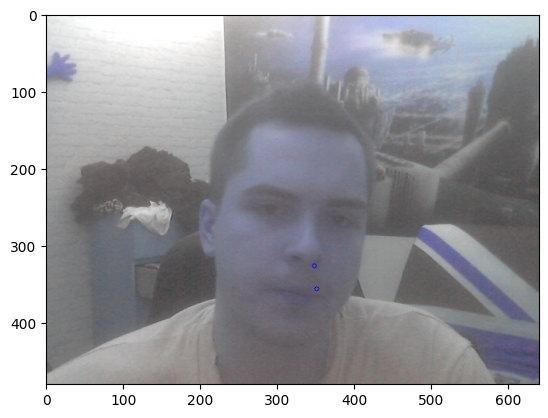

In [134]:
plt.imshow(frame)

In [8]:
annotated_image = frame.copy()

left_eye_coords = utils.get_coords(model_results,  frame.shape[0: 2], constants.LEFT_EYE_POINTS)
right_eye_coords = utils.get_coords(model_results,  frame.shape[0: 2], constants.RIGHT_EYE_POINTS)
mouth_coords = utils.get_coords(model_results,  frame.shape[0: 2], constants.LIPS_POINTS)

nose_coords = utils.get_coords(model_results,  frame.shape[0: 2], [2])

left_eye_center  = utils.calculate_geom_center(left_eye_coords)
right_eye_center  = utils.calculate_geom_center(right_eye_coords)
mouth_center = utils.calculate_geom_center(mouth_coords)

eyes_dist = utils.calculate_euclidean_norm(left_eye_center, right_eye_center)
nose_mouth_dist = utils.calculate_euclidean_norm(nose_coords, mouth_center)

In [9]:
mouth_coords.argmax(axis=0)

array([25,  3], dtype=int64)

In [138]:
mouth_coords[25], constants.LIPS_POINTS[25]

(array([378.10161591, 367.64061928]), 291)

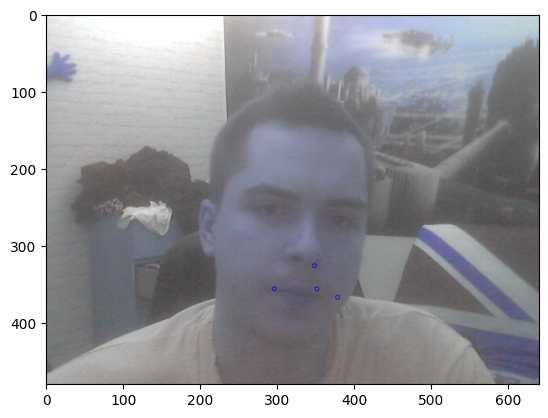

In [137]:
# nose_points = utils.get_coords(nose_points,  cropped_image.shape[0: 2], [2])
image = cv2.circle(frame, mouth_coords[25].astype(int), 3, color=(0, 0, 255))
plt.imshow(image)


In [109]:
nose_mouth_dist

72.3436694713342

In [94]:
model_resultsmodel_results

landmark {
  x: 0.5693413615226746
  y: 0.7344051003456116
  z: -0.09112244844436646
}
landmark {
  x: 0.5254607200622559
  y: 0.6037970781326294
  z: -0.22716844081878662
}
landmark {
  x: 0.5345373749732971
  y: 0.6295801401138306
  z: -0.1054023802280426
}
landmark {
  x: 0.4624267816543579
  y: 0.478921115398407
  z: -0.19058941304683685
}
landmark {
  x: 0.5168655514717102
  y: 0.5679924488067627
  z: -0.24836048483848572
}
landmark {
  x: 0.506289541721344
  y: 0.5149920582771301
  z: -0.24016672372817993
}
landmark {
  x: 0.4819736182689667
  y: 0.3807702660560608
  z: -0.15083181858062744
}
landmark {
  x: 0.19474443793296814
  y: 0.39312615990638733
  z: 0.033645108342170715
}
landmark {
  x: 0.4633505940437317
  y: 0.2918819487094879
  z: -0.1422700136899948
}
landmark {
  x: 0.45281746983528137
  y: 0.24512723088264465
  z: -0.16331171989440918
}
landmark {
  x: 0.41401800513267517
  y: 0.054568588733673096
  z: -0.15500910580158234
}
landmark {
  x: 0.5722213983535767
  y: 

In [82]:
left_eye_coords = utils.get_coords(model_results,  frame.shape[0: 2], constants.LEFT_EYE_POINTS)
right_eye_coords = utils.get_coords(model_results,  frame.shape[0: 2], constants.RIGHT_EYE_POINTS)
mouth_coords = utils.get_coords(model_results,  frame.shape[0: 2], constants.LIPS_POINTS)

nose_coords = utils.get_coords(model_results,  frame.shape[0: 2], [2])

left_eye_center  = utils.calculate_geom_center(left_eye_coords)
right_eye_center  = utils.calculate_geom_center(right_eye_coords)
mouth_center = utils.calculate_geom_center(mouth_coords)

eyes_dist = utils.calculate_euclidean_norm(left_eye_center, right_eye_center)
nose_mouth_dist = utils.calculate_euclidean_norm(nose_coords, mouth_center)

nose_mouth_dist, eyes_dist


(30.659664852242056, 80.65248839480012)

## Make csv file

In [ ]:
import pathli

In [ ]:
normalised point 

In [114]:
nose_points_raw = set()
for connection in mp_face_mesh.FACEMESH_NOSE:
    nose_points_raw.add(connection[0])
    nose_points_raw.add(connection[1])
nose_points_raw = list(nose_points_raw)
nose_points = utils.get_coords(model_results,  cropped_image.shape[0: 2], nose_points_raw)

In [115]:
nose_points

array([[ 91.43016529, 123.17460394],
       [ 93.00950325, 128.43434858],
       [ 89.93460596, 115.87045956],
       [ 88.09438026, 105.05837989],
       [ 83.86340958,  77.67713428],
       [ 92.20410633, 126.22004628],
       [ 97.49840069, 114.35955119],
       [115.83380485, 113.62181926],
       [116.7642163 , 116.34807873],
       [ 82.23718858,  67.93451786],
       [ 82.50719261, 117.03173804],
       [ 67.01908958, 122.173002  ],
       [104.38306797, 113.15190911],
       [ 67.42720699, 124.94945526],
       [ 86.65017396,  95.64365852],
       [ 85.31804931,  86.90036416],
       [103.29799068, 125.92084122],
       [114.94952452, 121.00133944],
       [110.58272731, 112.62549448],
       [ 76.22374946, 118.14685965],
       [ 92.55621922, 127.23482895],
       [ 82.90744865, 129.4713707 ],
       [ 71.05244207, 128.67165041],
       [ 70.9753114 , 119.5994153 ]])

In [116]:
anose_points_raw

NameError: name 'anose_points_raw' is not defined

In [117]:
nose_points_raw

[1,
 2,
 4,
 5,
 6,
 19,
 275,
 278,
 294,
 168,
 45,
 48,
 440,
 64,
 195,
 197,
 326,
 327,
 344,
 220,
 94,
 97,
 98,
 115]

In [118]:
import matplotlib.pyplot as plt

In [121]:
nose_points

array([[ 91.43016529, 123.17460394],
       [ 93.00950325, 128.43434858],
       [ 89.93460596, 115.87045956],
       [ 88.09438026, 105.05837989],
       [ 83.86340958,  77.67713428],
       [ 92.20410633, 126.22004628],
       [ 97.49840069, 114.35955119],
       [115.83380485, 113.62181926],
       [116.7642163 , 116.34807873],
       [ 82.23718858,  67.93451786],
       [ 82.50719261, 117.03173804],
       [ 67.01908958, 122.173002  ],
       [104.38306797, 113.15190911],
       [ 67.42720699, 124.94945526],
       [ 86.65017396,  95.64365852],
       [ 85.31804931,  86.90036416],
       [103.29799068, 125.92084122],
       [114.94952452, 121.00133944],
       [110.58272731, 112.62549448],
       [ 76.22374946, 118.14685965],
       [ 92.55621922, 127.23482895],
       [ 82.90744865, 129.4713707 ],
       [ 71.05244207, 128.67165041],
       [ 70.9753114 , 119.5994153 ]])

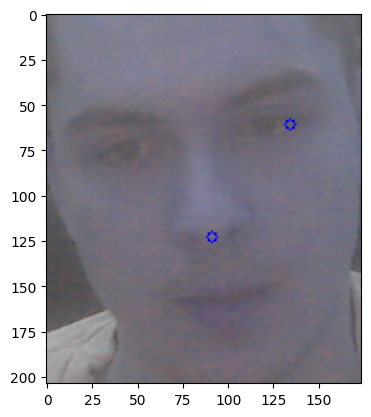

In [122]:
# nose_points = utils.get_coords(nose_points,  cropped_image.shape[0: 2], [2])
image = cv2.circle(cropped_image, nose_points[0].astype(int), 3, color=(0, 0, 255))
plt.imshow(image)


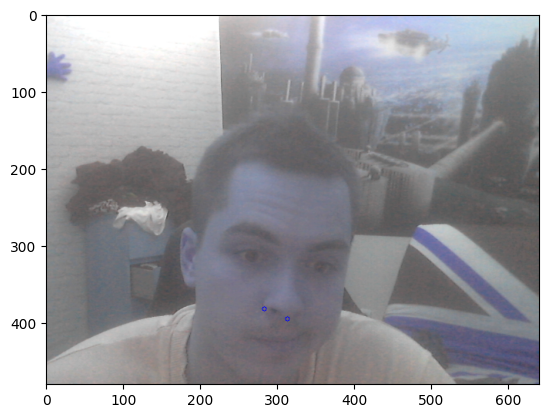

In [59]:
plt.imshow(image)

In [ ]:
        # utils.get_coords(model_results,  frame.shape[0: 2], )

        # lips_points = set()
        # for connection in points:
        #     lips_points.add(connection[0])
        #     lips_points.add(connection[1])

        # for idx, landmark in enumerate(model_results.landmark):
        #     if not idx in lips_points:
        #         landmark.visibility = 0
                
        

        # print(type(model_results))

        #   mp_drawing.draw_landmarks(annotated_image, face_landmarks, mp_face_mesh.FACEMESH_TESSELATION)
        # mp_drawing.draw_landmarks(annotated_image, results, mp_face_mesh.FACEMESH_LIPS)
    # mp_drawing.draw_landmarks(annotated_image, model_results, points)

In [76]:
nose_points_raw[1]

2

In [75]:
nose_points

array([[274.39594269, 317.8745842 ],
       [272.54737854, 322.00183868],
       [274.31097031, 310.48656464],
       [273.28216553, 298.70544434],
       [269.72770691, 267.42124557],
       [273.91845703, 320.56835175],
       [281.78934097, 309.59183693],
       [296.59374237, 308.36491585],
       [296.2509346 , 310.68486214],
       [268.53805542, 256.15940094],
       [266.17521286, 310.70277214],
       [245.56522369, 311.93902016],
       [287.84812927, 308.49855423],
       [245.01972198, 314.24517632],
       [272.06914902, 288.07285309],
       [270.92788696, 278.08047295],
       [282.51554489, 320.26571274],
       [293.41287613, 314.97210503],
       [292.8560257 , 307.79660225],
       [258.33417892, 310.62612534],
       [273.28195572, 321.31782532],
       [261.63286209, 321.5669632 ],
       [247.67961502, 318.11310768],
       [251.18118286, 310.69401741]])

In [74]:
nose_points.argmax(axis=0)

array([7, 1], dtype=int64)

In [60]:
nose_points[3]

array([322.16911316, 367.73514748])

In [ ]:
13

In [21]:
lips_points = set()
for connection in mp_face_mesh.FACEMESH_NOSE:
    lips_points.add(connection[0])
    lips_points.add(connection[1])

In [ ]:
lips_points

In [22]:

FACEMESH_NOSE = frozenset([(168, 6), (6, 197), (197, 195), (195, 5),
                           (5, 4), (4, 1), (1, 19), (19, 94), (94, 2), (98, 97),
                           (97, 2), (2, 326), (326, 327), (327, 294),
                           (294, 278), (278, 344), (344, 440), (440, 275),
                           (275, 4), (4, 45), (45, 220), (220, 115), (115, 48),
                           (48, 64), (64, 98)])

{1,
 2,
 4,
 5,
 6,
 19,
 45,
 48,
 64,
 94,
 97,
 98,
 115,
 168,
 195,
 197,
 220,
 275,
 278,
 294,
 326,
 327,
 344,
 440}

In [18]:
left_eye_center

array([299.47563291, 329.37023699])

In [19]:
(left_eye_coords[0] - left_eye_center[0]) / eyes_dist

array([0.15963449, 0.23481624])

In [14]:
eyes_dist

127.6739376376799

In [12]:
left_eye_center / eyes_dist

array([3.35926366, 2.94150701])

In [11]:
point = np.array([[1, 2]])

In [ ]:
point - 

In [8]:
right_eye_coords.shape

(16, 2)